In [1]:
import numpy as np

import random
import matplotlib.pyplot as plt

In [2]:
def update_velocity(particle, velocity, pbest, gbest, w_min=0.5, max=1.0, c=0.1):
    num_particle = len(particle)
    new_velocity = np.array([0.0 for i in range(num_particle)])
    
    r1 = random.uniform(0,max)
    r2 = random.uniform(0,max)
    w = random.uniform(w_min,max)
    c1 = c
    c2 = c
    
    for i in range(num_particle):
        new_velocity[i] = w*velocity[i] + c1*r1*(pbest[i]-particle[i])+c2*r2*(gbest[i]-particle[i])

    return new_velocity

In [3]:
def update_position(particle, velocity):
    new_particle = particle + velocity
    return new_particle

In [4]:
def particle_swarm(population, dimension, position_min, position_max, generation, fitness_criterion, fitness_function):
    particles = [[random.uniform(position_min, position_max) for j in range(dimension)] for i in range(population)]

    pbest_position = particles
    # Fitness
    pbest_fitness = [fitness_function(p[0],p[1]) for p in particles]
    # Index of the best particle
    gbest_index = np.argmin(pbest_fitness)
    # Global best particle position
    gbest_position = pbest_position[gbest_index]
    # Velocity (starting from 0 speed)
    velocity = [[0.0 for j in range(dimension)] for i in range(population)]
  
    # Loop for the number of generation
    for t in range(generation):
        # Stop if the average fitness value reached a predefined success criterion
        if np.average(pbest_fitness) <= fitness_criterion:
            break
        else:
            for n in range(population):
                # Update the velocity of each particle
                velocity[n] = update_velocity(particles[n], velocity[n], pbest_position[n], gbest_position)
                # Move the particles to new position
                particles[n] = update_position(particles[n], velocity[n])
            # Calculate the fitness value
        pbest_fitness = [fitness_function(p[0],p[1]) for p in particles]
        # Find the index of the best particle
        gbest_index = np.argmin(pbest_fitness)
        # Update the position of the best particle
        gbest_position = pbest_position[gbest_index]

    # Print the results
    print('Global Best Position: ', gbest_position)
    print('Best Fitness Value: ', min(pbest_fitness))
    print('Average Particle Best Fitness Value: ', np.average(pbest_fitness))
    print('Number of Generation: ', t)

In [5]:
def particle_swarm_optimization():
    c1, c2, w = np.random.uniform(0,1,3)
    
    print(c1, c2, w)

In [33]:
particle_swarm_optimization()

0.40200238989673687 0.1114482891686347 0.20468972129662855


# Particle Swarm Optimization
### TAREA: Linear Programming with PSO

* Modelar los 5 problemas de programación lineal (Escribir en el notebook)
* Resolver los problemas con scipy.optimize.linprog
* Implementar PSO para que resuelva problemas con restricciones lineales
* Resolver los problemas del punto 1 con su implementación de PSO

$$ MAX =  20,000 p + 15,000 m \\
p+2m \le 80 \\
3p+2m \le 120 \\
p,m \ge 0 $$

#### Scipy Approach

In [7]:
import scipy as sp
from scipy.optimize import linprog

##### 1. Bike Problem

In [29]:
def objective_func_PS(p, m):
    A_ub = [
        [1,2],
        [3,2]
    ]

    b_ub = [80, 120]

    #p, m = X[0], X[1]

    if p + 2*m <= 80 or 3*p + 2*m <= 120: 
        return 100000
        
    return 20000*p + 15000*m

In [9]:
def objective_func(p,m):
    if p + 2*m <= 80 or 3*p + 2*m <= 120: return -1
    return 20000*p + 15000*m

In [10]:
bounds = [
    [0,None], # Bicicletas de paseo
    [0,None]  # Bicicletas de montaña 
]

In [11]:
coef = [-20000, -15000]

In [12]:
A_ub = [
    [1,2],
    [3,2]
]

In [13]:
b_ub = [80, 120]

In [14]:
linprog(coef, A_ub=A_ub, b_ub=b_ub, bounds=bounds)

     con: array([], dtype=float64)
     fun: -849999.9999361178
 message: 'Optimization terminated successfully.'
     nit: 7
   slack: array([6.07792572e-09, 9.00556074e-09])
  status: 0
 success: True
       x: array([20., 30.])

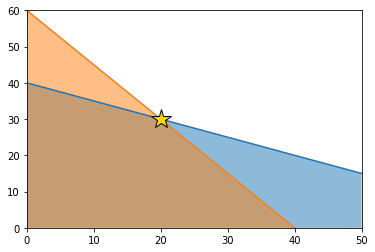

In [15]:
x1 = np.linspace(0,50,100)
y1 = 40 - 0.5*x1

x2 = np.linspace(0,50,100)
y2 = 60 - (3/2)*x2

elite = np.array([20, 30])

plt.figure()
plt.plot(x1, y1)
plt.fill_between(x1, y1, 0, alpha=0.5)
plt.plot(x2, y2)
plt.fill_between(x2, y2, 0, alpha=0.5)
plt.plot(elite[0], elite[1], marker="*", markersize=20, markeredgecolor="black", markerfacecolor="#FFD700")
plt.xlim(0,50)
plt.ylim(0,60)
plt.show()

In [32]:
population = 100
dimension = 2
position_min = 0
position_max = 120.0
generation = 400
fitness_criterion = 10e-4

particle_swarm(population, dimension, position_min, position_max, generation, fitness_criterion, objective_func_PS)

Global Best Position:  [19.1021499  -4.01586135]
Best Fitness Value:  100000
Average Particle Best Fitness Value:  100000.0
Number of Generation:  399


##### 2. Lamps

In [ ]:
bounds = [
    [0,None], # Tipo de lampara 1
    [0,None]  # Tipo de lampara 2
]

In [ ]:
coef = [-15, -10]

In [ ]:
A_ub = [
    [1/3, 1/2],
    [1/6, 1/6]
]

In [ ]:
b_ub = [100, 80]

In [ ]:
linprog(coef, A_ub=A_ub, b_ub=b_ub, bounds=bounds)

           con: array([], dtype=float64)
 crossover_nit: 0
         eqlin:  marginals: array([], dtype=float64)
  residual: array([], dtype=float64)
           fun: -4500.0
       ineqlin:  marginals: array([-45.,  -0.])
  residual: array([ 0., 30.])
         lower:  marginals: array([ 0. , 12.5])
  residual: array([300.,   0.])
       message: 'Optimization terminated successfully. (HiGHS Status 7: Optimal)'
           nit: 2
         slack: array([ 0., 30.])
        status: 0
       success: True
         upper:  marginals: array([0., 0.])
  residual: array([inf, inf])
             x: array([300.,   0.])

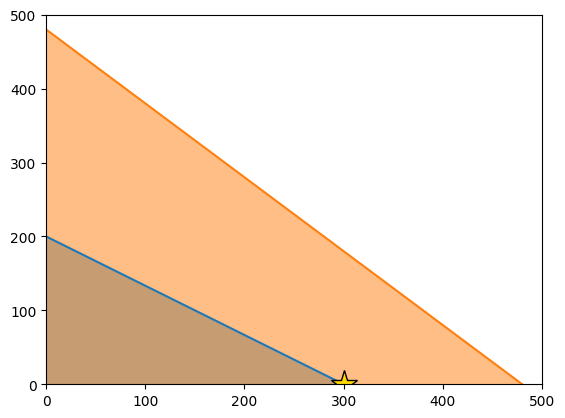

In [ ]:
x1 = np.linspace(0,500,100)
y1 = (100 - (1/3)*x1)*2

x2 = np.linspace(0,500,100)
y2 = (80 - (1/6)*x2)*6

elite = np.array([300, 0])

plt.figure()
plt.plot(x1, y1)
plt.fill_between(x1, y1, 0, alpha=0.5)
plt.plot(x2, y2)
plt.fill_between(x2, y2, 0, alpha=0.5)
plt.plot(elite[0], elite[1], marker="*", markersize=20, markeredgecolor="black", markerfacecolor="#FFD700")
plt.xlim(0,500)
plt.ylim(0,500)

plt.show()

##### Poyoyon

In [ ]:
coef = [10, 30]

In [ ]:
A_ub = [
    [-1, -5],
    [-5, -1]
]

In [ ]:
b_ub = [-15, -15]

In [ ]:
linprog(coef, A_ub=A_ub, b_ub=b_ub)

           con: array([], dtype=float64)
 crossover_nit: 0
         eqlin:  marginals: array([], dtype=float64)
  residual: array([], dtype=float64)
           fun: 100.0
       ineqlin:  marginals: array([-5.83333333, -0.83333333])
  residual: array([0., 0.])
         lower:  marginals: array([0., 0.])
  residual: array([2.5, 2.5])
       message: 'Optimization terminated successfully. (HiGHS Status 7: Optimal)'
           nit: 2
         slack: array([0., 0.])
        status: 0
       success: True
         upper:  marginals: array([0., 0.])
  residual: array([inf, inf])
             x: array([2.5, 2.5])

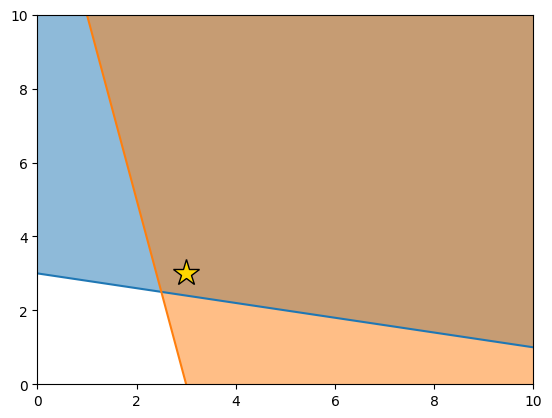

In [ ]:
x1 = np.linspace(0,10,100)
y1 = (15 - 1*x1)*(1/5)

x2 = np.linspace(0,10,100)
y2 = (15 - 5*x2)*(1)

elite = np.array([3, 3])

plt.figure()
plt.plot(x1, y1)
plt.fill_between(x1, y1, 100, alpha=0.5)
plt.plot(x2, y2)
plt.fill_between(x2, y2, 100, alpha=0.5)
plt.plot(elite[0], elite[1], marker="*", markersize=20, markeredgecolor="black", markerfacecolor="#FFD700")
plt.xlim(0,10)
plt.ylim(0,10)

plt.show()

##### Utiles

In [ ]:
bounds = [
    [0,500],
    [0,500]
]

In [ ]:
coef = [-6.5, -7]

In [ ]:
A_ub = [
    [2, 3],
    [1, 1],
    [2, 1]
]

In [ ]:
b_ub = [600, 500, 400]

In [ ]:
linprog(coef, A_ub=A_ub, b_ub=b_ub, bounds=bounds)

           con: array([], dtype=float64)
 crossover_nit: 0
         eqlin:  marginals: array([], dtype=float64)
  residual: array([], dtype=float64)
           fun: -1675.0
       ineqlin:  marginals: array([-1.875, -0.   , -1.375])
  residual: array([  0., 250.,   0.])
         lower:  marginals: array([0., 0.])
  residual: array([150., 100.])
       message: 'Optimization terminated successfully. (HiGHS Status 7: Optimal)'
           nit: 2
         slack: array([  0., 250.,   0.])
        status: 0
       success: True
         upper:  marginals: array([0., 0.])
  residual: array([350., 400.])
             x: array([150., 100.])

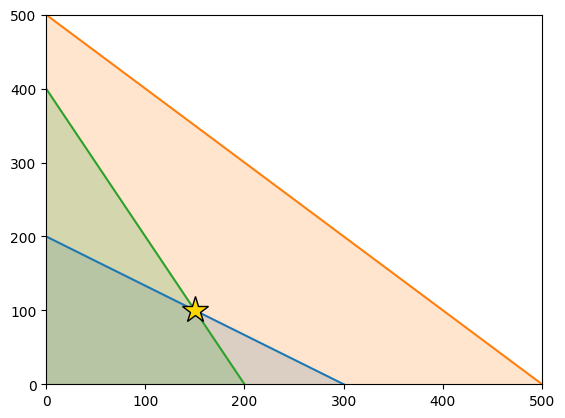

In [ ]:
x1 = np.linspace(0,500,100)
y1 = (600 - 2*x1)*(1/3)

x2 = np.linspace(0,500,100)
y2 = (500 - x2)

x3 = np.linspace(0,500,100)
y3 = (400 - 2*x3)

elite = np.array([150, 100])

plt.figure()
plt.plot(x1, y1)
plt.fill_between(x1, y1, 0, alpha=0.2)
plt.plot(x2, y2)
plt.fill_between(x2, y2, 0, alpha=0.2)
plt.plot(x3, y3)
plt.fill_between(x3, y3, 0, alpha=0.2)
plt.plot(elite[0], elite[1], marker="*", markersize=20, markeredgecolor="black", markerfacecolor="#FFD700")
plt.xlim(0,500)
plt.ylim(0,500)

plt.show()

##### Excursión

In [ ]:
bounds = [
    [0,8],
    [0,10]
]

In [ ]:
coef = [600,800]

In [ ]:
A_ub = [
    [-40, -50],
    [1, 1]
]

In [ ]:
b_ub = [-400, 9]

In [ ]:
linprog(coef, A_ub=A_ub, b_ub=b_ub, bounds=bounds)

           con: array([], dtype=float64)
 crossover_nit: 0
         eqlin:  marginals: array([], dtype=float64)
  residual: array([], dtype=float64)
           fun: 6200.0
       ineqlin:  marginals: array([ -20., -200.])
  residual: array([0., 0.])
         lower:  marginals: array([0., 0.])
  residual: array([5., 4.])
       message: 'Optimization terminated successfully. (HiGHS Status 7: Optimal)'
           nit: 0
         slack: array([0., 0.])
        status: 0
       success: True
         upper:  marginals: array([0., 0.])
  residual: array([3., 6.])
             x: array([5., 4.])

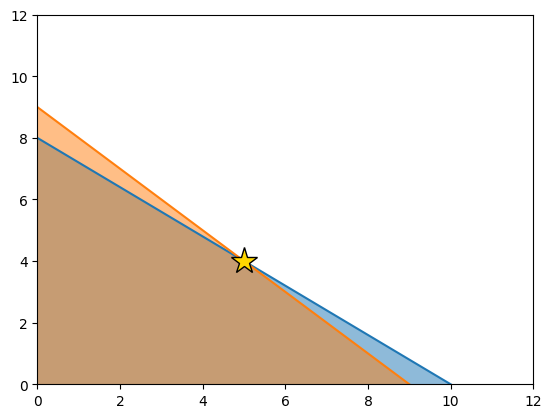

In [ ]:
x1 = np.linspace(0,15,100)
y1 = (400 - 40*x1)*(1/50)

x2 = np.linspace(0,15,100)
y2 = (9 - x2)

elite = np.array([5, 4])

plt.figure()
plt.plot(x1, y1)
plt.fill_between(x1, y1, 0, alpha=0.5)
plt.plot(x2, y2)
plt.fill_between(x2, y2, 0, alpha=0.5)
plt.plot(elite[0], elite[1], marker="*", markersize=20, markeredgecolor="black", markerfacecolor="#FFD700")
plt.xlim(0,12)
plt.ylim(0,12)

plt.show()